<a href="https://colab.research.google.com/github/jinunyachhyon/Deep-Learning-with-Tensorflow/blob/main/CIFAR_Image_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load CIFAR-10 dataset

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_name = ['airplane','automobile','bird','cat','deer',
             'dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
from keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [4]:
# Shape of train images and train labels
train_images.shape, train_labels.shape, train_labels_cat.shape

((50000, 32, 32, 3), (50000, 1), (50000, 10))

The images are 3 dimensional i.e RGB and of 32x32

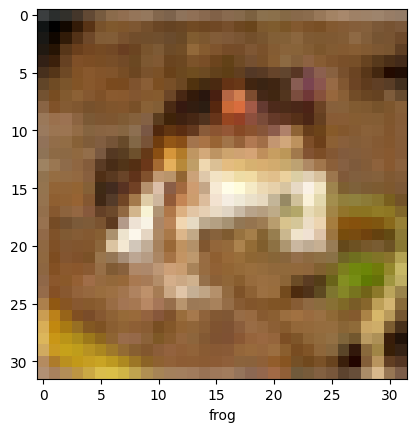

In [5]:
# Looking at an image for given index
index = 0

plt.imshow(train_images[index])
plt.xlabel(class_name[(train_labels[index][0])])
plt.show()

# CNN Architecture

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

# Convolution Base
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
# Fully connected layer
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Model Checkpoint to save the best model
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath = "CIFAR-10_model.h5", 
                                  save_best_only = True)


In [11]:
# Early Stopping if model doesnot improve
from tensorflow.keras.callbacks import EarlyStopping
monitor_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=3)

In [12]:
# Fit the model
model.fit(train_images, train_labels_cat,
         epochs=10,
         validation_data=(test_images, test_labels_cat),
         callbacks=[model_checkpoint, monitor_val_accuracy],
         verbose=1)

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5372 - accuracy: 0.4420 - val_loss: 1.2496 - val_accuracy: 0.5540
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1716 - accuracy: 0.5867 - val_loss: 1.1613 - val_accuracy: 0.5899
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0182 - accuracy: 0.6404 - val_loss: 1.0146 - val_accuracy: 0.6462
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9202 - accuracy: 0.6744 - val_loss: 0.9508 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8463 - accuracy: 0.7019 - val_loss: 0.9025 - val_accuracy: 0.6864
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7852 - accuracy: 0.7250 - val_loss: 0.8994 - val_accuracy: 0.6872
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7361 - accuracy: 0.7423 - val_loss: 0.9186 - val_accurac

In [13]:
# Evaluate the model
model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.8802 - accuracy: 0.7114


[0.8802300095558167, 0.7113999724388123]

# Data Augumentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augumentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

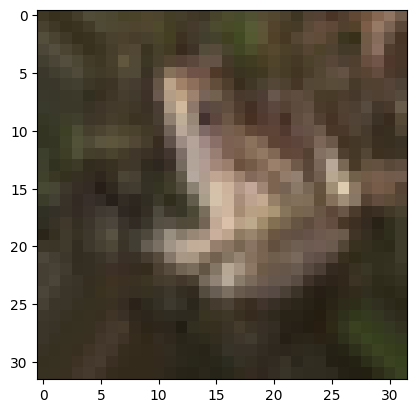

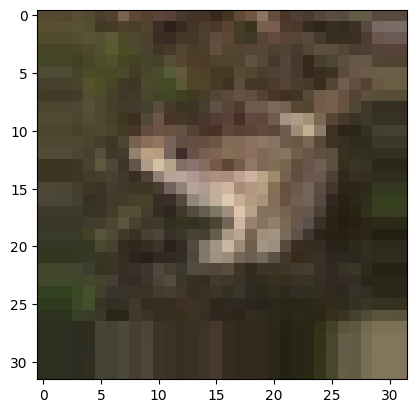

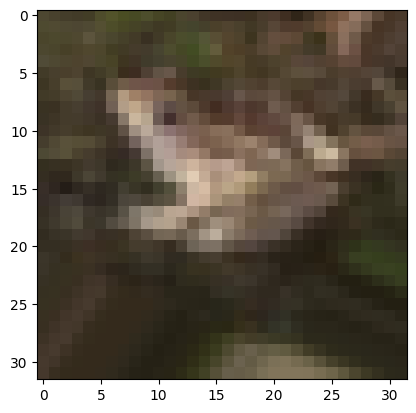

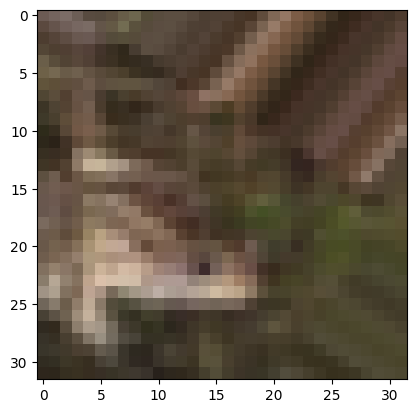

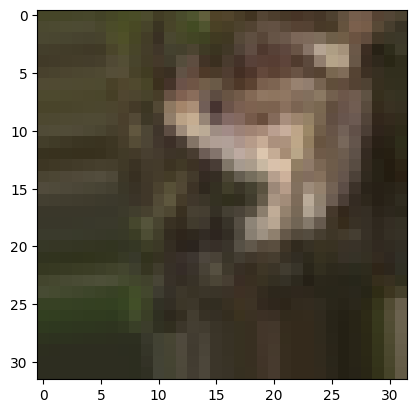

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pick an image to transform
test_img = train_images[22]
img = image.img_to_array(test_img) # Convert image to numpy array
img = np.expand_dims(img, axis=0) # Reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # this loop runs forever until we break, saving images to current directory
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4: # show 4 images
    break

plt.show()